The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Load the dataset
nobel = pd.read_csv("data/nobel.csv")

# 1. What is the most commonly awarded gender and birth country?

# Most common gender
top_gender = nobel["sex"].value_counts().index[0]

# Most common birth country
top_country = nobel["birth_country"].value_counts().index[0]

print(f"Most commonly awarded gender: {top_gender}")
print(f"Most commonly awarded birth country: {top_country}")

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America


In [4]:
# 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Create a column for US-born winners
nobel["us_born_winner"] = nobel["birth_country"] == "United States of America"

# Create the decade column
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)

# Calculate the ratio of US-born winners per decade
decade_us_ratio = nobel.groupby("decade", as_index=False)["us_born_winner"].mean()

# Identify the decade with the highest ratio
max_decade_usa = decade_us_ratio.sort_values(by="us_born_winner", ascending=False)["decade"].iloc[0]

print(f"\nDecade with the highest ratio of US-born winners: {max_decade_usa}")


Decade with the highest ratio of US-born winners: 2000


<Figure size 1000x600 with 0 Axes>

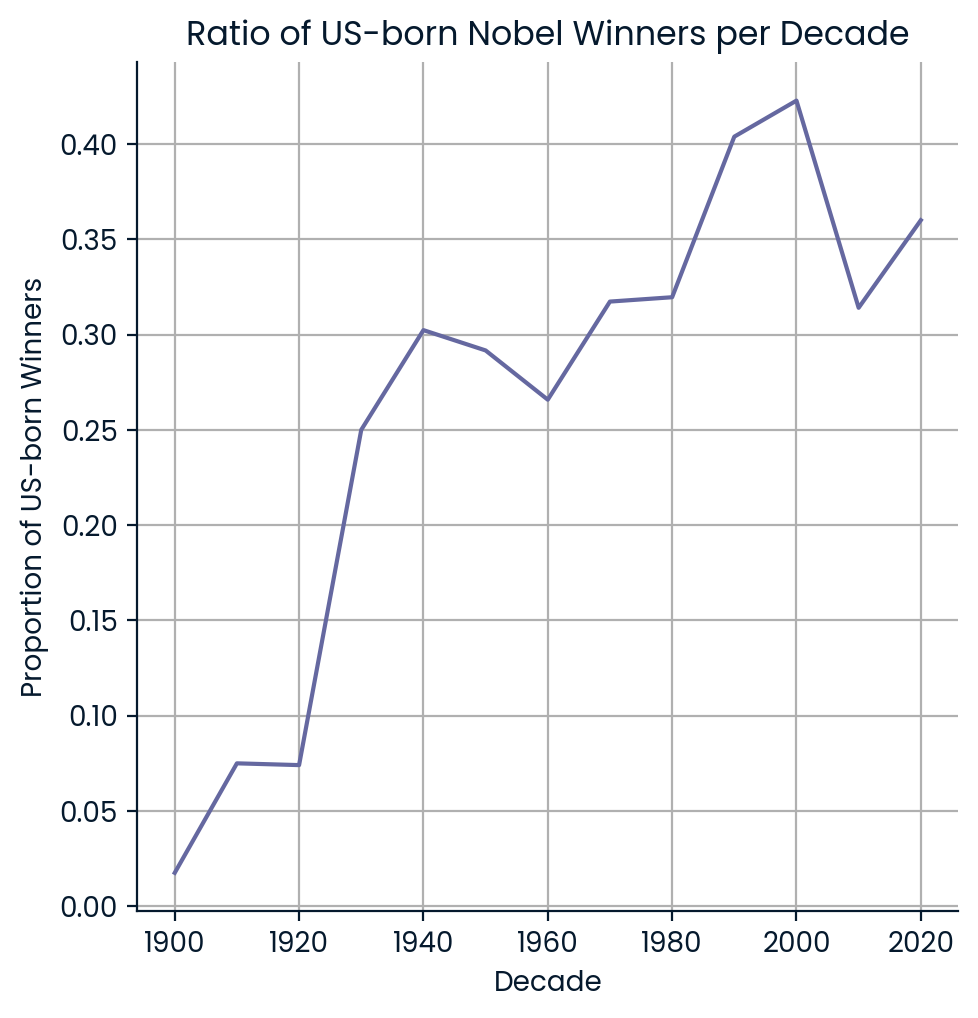

In [6]:
# Optional: Create a relational line plot for US-born winners ratio

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.relplot(x="decade", y="us_born_winner", data=decade_us_ratio, kind="line")
plt.title("Ratio of US-born Nobel Winners per Decade")
plt.xlabel("Decade")
plt.ylabel("Proportion of US-born Winners")
plt.grid(True)
plt.show()

In [7]:
# 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

# Filter for female winners
nobel["female_winner"] = nobel["sex"] == "Female"

# Group by decade and category to find the proportion of female winners
female_by_decade_category = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Find the row with the highest proportion of female winners
max_female_proportions = female_by_decade_category.loc[
    female_by_decade_category["female_winner"].idxmax()
]

# Extract the decade and category
max_female_dict = {
    max_female_proportions["decade"]: max_female_proportions["category"]
}

print(f"\nDecade and category with the highest proportion of female laureates: {max_female_dict}")


Decade and category with the highest proportion of female laureates: {2020: 'Literature'}


<Figure size 1200x700 with 0 Axes>

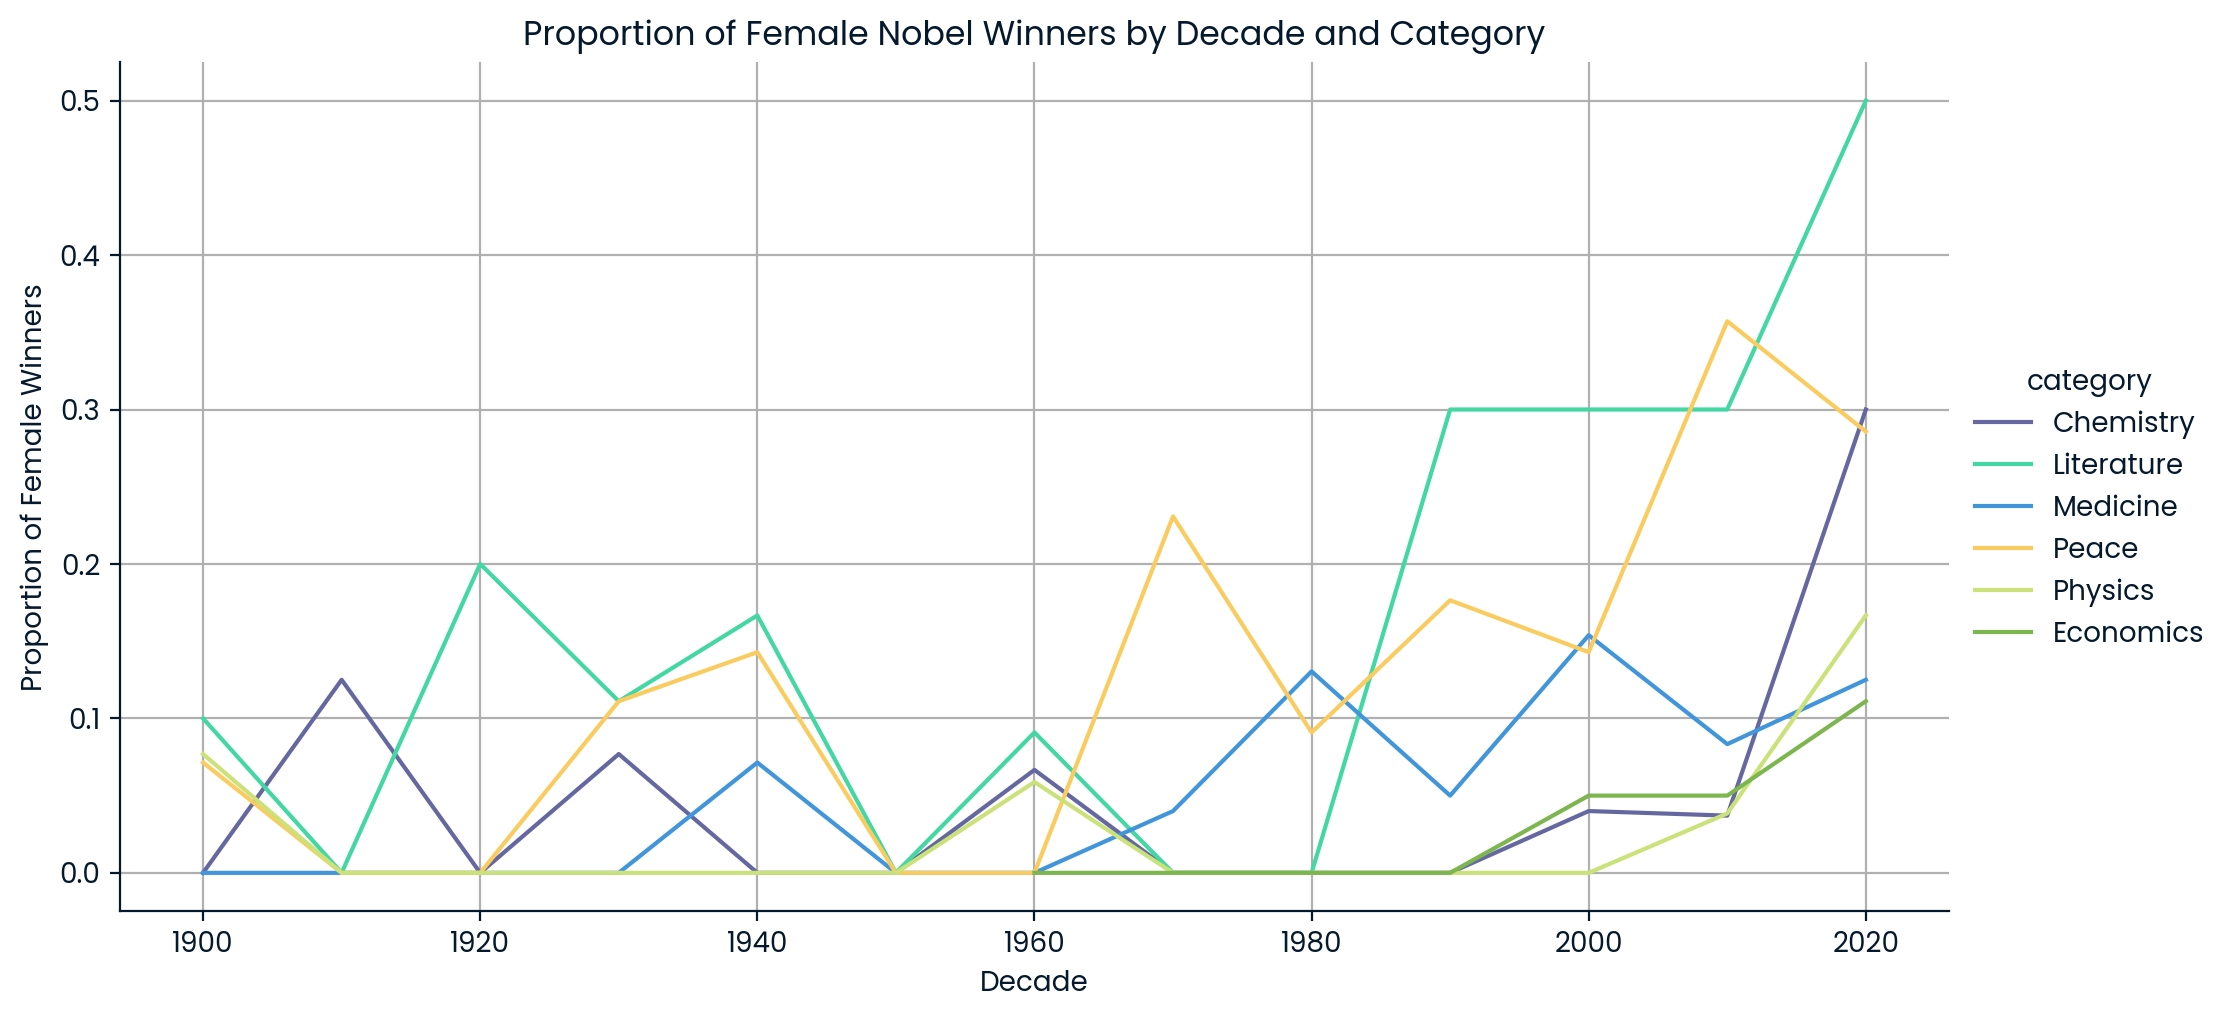

In [8]:
# Optional: Create a relational line plot with multiple categories

plt.figure(figsize=(12, 7))
sns.relplot(x="decade", y="female_winner", hue="category", data=female_by_decade_category, kind="line", aspect=2)
plt.title("Proportion of Female Nobel Winners by Decade and Category")
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners")
plt.grid(True)
plt.show()

In [9]:
# 4. Who was the first woman to receive a Nobel Prize, and in what category?

# Filter for female winners
female_winners = nobel[nobel["sex"] == "Female"]

# Find the earliest year among female winners
first_woman_winner = female_winners.sort_values(by="year").iloc[0]

first_woman_name = first_woman_winner["full_name"]
first_woman_category = first_woman_winner["category"]

print(f"\nFirst woman to receive a Nobel Prize: {first_woman_name}")
print(f"Category: {first_woman_category}")


First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


In [10]:
# 5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

# Count the occurrences of each full_name
repeat_winners = nobel["full_name"].value_counts()

# Filter for those with 2 or more wins
repeat_list = list(repeat_winners[repeat_winners >= 2].index)

print(f"\nIndividuals or organizations with more than one Nobel Prize: {repeat_list}")


Individuals or organizations with more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
